# Quantum Simulation of the Schrodinger Equation


PHYS UN3081

Prof. Sebastian Will

Created by Joseph Lee


Last editted 02/26/25 by Erik Lundstrum


# Quantum Tunneling

In this lecture, we will discuss how we can use a quantum computer to simulate quantum tunneling. *This concept will require knowledge of the quantum fourier transform.*

# Today's Topics

"Experimental simulation of quantum tunneling in small systems" (Feng et al., 2013)
https://www.nature.com/articles/srep02232.pdf

*Note: This paper using some different ordering conventions, so while the physics is the same, this lecture will follow more closely a convention you have worked with!*


1) Time Evolution

     1a) Suzuki-Trotter Formula
    
2) The Double Well

3) Mapping the Problem to a Quantum Computer

    3a) The Kinetic Term

    3b) The Potential Term
    


# Time Evolution


In quantum mechanics, time evolution is given by the Schrodinger equation:

$$ i \hbar \frac{\partial }{\partial t} |\psi(x,t) \rangle = \hat{H} | \psi (x,t) \rangle $$


**Q:** *If our system has a **time-independent** Hamiltonian, if we are given a state $ | \psi(x, 0) \rangle$, how does it evolve in time?*

$$ | \psi(x, t) \rangle = e^{-i\hat{H}t/\hbar}| \psi(x, 0) \rangle $$



**Q:** *If we are in an eigenstate of $\hat{H}$, how do we evolve in time?*
    

For the $n$th energy eigenstate, we have:

$$ |n(t) \rangle = e^{-iE_n t/\hbar}|n(0)\rangle$$

For example,if we had the ground state of the Harmonic oscillator ($E_0 = \hbar\omega/2$), our state would be:

$$ |n=0, t \rangle = e^{-i\omega t/2}| n=0, t=0 \rangle $$

In certain cases, we will be able to simulate the time evolution of a particle in real space.

# Time Evolution

Let's assume that our Hamiltonian can be broken into some kinetic part and potential part. 

$$ \hat{H} = \hat{K} + \hat{V} $$

Note that many of the problems you have seen in quantum mechanics courses have taken this form.


For example, the harmonic oscillator had a hamiltonian in the form:
    
$$ \hat{H} = \frac{\hat{p}^2}{2m} + \frac{1}{2}m\omega^2 x^2$$

# Suzuki-Trotter

In general, any state that is evolved some $\Delta t$ can be written as
$$ | \psi(x, t + \Delta t) \rangle = e^{-i\hat{H}\Delta t} | \psi(x, t )\rangle = e^{-i(\hat{K} + \hat{V})\Delta t} | \psi(x, t ) \rangle $$

(We have set $\hbar = 1$.)


However, it can be difficult to actually simulate this on a quantum computer. In order to deal with this, our goal is to split up our exponential into one exponential of $\hat{K}$ and one exponential of $\hat{V}$.

# Suzuki-Trotter Short Proof

Our time evolution term takes the form: 

$$ e^{-i\hat{H}t} = e^{-i(\hat{K}+\hat{V})t} $$


**NOTE!** Generally, for operators:

$$ e^{-i(\hat{K}+\hat{V})t} \neq e^{-i\hat{K}t}e^{-i\hat{V}t}$$

This is because operators don't generally commute. 

As a reminder, note that the general matrix exponential is given as:

$$ e^A = \sum_{k=0}^\infty \frac{A^k}{k!}$$

The proper expansion of the exponential of $\hat{K}+\hat{V}$ is:

$$ \begin{aligned} e^{-i(\hat{K}+\hat{V})t} &= 1 + (-it)(\hat{K}+\hat{V}) + \frac{1}{2}(-it)^2(\hat{K}+\hat{V})^2 + O(t^3) \\
&= 1 + (-it)(\hat{K}+\hat{V}) + \frac{1}{2}(-it)^2[\hat{K}^2 + \hat{K}\hat{V} + \hat{V}\hat{K} + \hat{V}^2] + O(t^3)
\end{aligned}$$

($1$ here is the identity operator)


Let's compare this to the quantity $e^{-i\hat{K}t}e^{-i\hat{V}t}$. This product of exponentials can be expanded as:
$$ \begin{aligned} e^{-i\hat{K}t}e^{-i\hat{V}t} &= (1 + (-it)\hat{K} + \frac{1}{2}(-it)^2\hat{K}^2 + ... )(1 + (-it)\hat{V} + \frac{1}{2}(-it)^2\hat{V}^2 + ... ) \\
&= 1 + (-it)(\hat{K}+\hat{V}) + \frac{1}{2}(-it)^2(\hat{K}^2 + 2\hat{K}\hat{V} + \hat{V}^2) + O(t^3) 
\end{aligned}$$  



Note that we can view our approximation as the proper time evolution with some corrections in the exponential.

$$ e^{-i\hat{K}t}e^{-i\hat{V}t} = e^{-i(\hat{K}+\hat{V})t + \frac{1}{2} (-it)^2[\hat{K}, \hat{V}] + O(t^3)}$$



Thus, $ e^{-i(\hat{K}+\hat{V})t} \approx e^{-i\hat{K}t} e^{-i\hat{V}t} $ is a good approximation if $\frac{1}{2} (-it)^2[\hat{K}, \hat{V}]$ is small, and if $\Delta t$ is small, with equality if $[\hat{K}, \hat{V}] = 0$.  

It's important to keep $t$, or in our case, $\Delta t$, small. However, we should also recognize that $[\hat{K},\hat{V}]$ must be small as well.



# The Double Well

The problem we will consider is that of the **double well** - two finite square wells right next to each other. We will also assume that we have **periodic boundary conditions**.


<img src="Tunneling Images/Double Well.png">

While we could solve this problem analytically from Schrodinger's equation, let's try to intuit the results. Suppose our particle starts in one of the wells.


<img src="Tunneling Images/Double Well Step 1.png">

**Q**: As time goes on, what do you suspect will happen?

The particle may tunnel through the barrier and end up in the other well! 

<img src="Tunneling Images/Double Well Step 2.png">

We expect that this will happen back and forth, so the particle will always end up in one of the two wells. 

# Mapping the Problem to a Quantum Circuit

<img src="Tunneling Images/Full_Circuit.png">

In order to simulate time evolution on a quantum computer, we would need a way to initialize the initial state, apply the time evolution, and then measure the resulting state. 

In this lecture, we will start by considering the Free Particle. We will then add the potential term!

To create the initial state, we choose a representation in which the position space, bounded by some interval $[0, L]$, is discretizes into segments. Potentials for the time evolution will be applied as single qubit Z-rotations. To implement the time evolution proportional to the kinetic term, we use the Quantum Fourier Transform (QFT) to work in momentum space. 


<img src="Tunneling Images/Space Line.png">

# Discretization of Space 

Representing continuous space in a quantum circuit may initially not be very obvious. The way we do so for this simulation is the following. Our goal is to map this problem to some $n$-qubit circuit. Consider a spatial interval of length $L$, given by $[0, L]$. Further assume that we have periodic boundary conditions on the wave function. 

That is: $ | \psi(x, t) \rangle = | \psi(x + L, t) \rangle$. 


We can fix some interval, $\Delta l = L / 2^n$. We can express the wavefunction as:

$$  | \psi (x, t) \rangle = \sum_{j=0}^{2^n - 1} \psi (x_j, t) | j \rangle_x$$



In the quantum circuits, express $| j \rangle$ in binary. The best way to see how this works is by example. 

Consider a case in which we discretize our space using $n=2$ qubits. Then, our space will be discretized into four intervals. We can express our wavefunction as:

$$ | \psi (x, t) \rangle = \psi (x_0, t) | 00 \rangle + \psi (x_1, t) | 01 \rangle +\psi (x_2, t) | 10 \rangle + \psi (x_3, t) | 11 \rangle$$ 

Note that the $j$ value in the kets correspond to the same $j$ that subscript the $x$. ($1 = 1$ in binary, $2 = 10$ in binary, etc.) 


<img src="Tunneling Images/psi x.png">

One way to approximate the above is or the entirely of $\psi(x_j)$ to be a constant. This is what we will end up doing on our quantum circuit. 

<img src="Tunneling Images/psi x estimate.png">

# Discretization of Momentum

We can similarly do this in momentum space. Let $| j \rangle_p$ represent the momentum basis. We can express a general state, $| \psi(p, t)\rangle$ as:

$$ | \psi(p, t)\rangle = \sum_{j=0}^{2^n - 1} \phi(p_j, t) | j\rangle = \phi (p_0, t) | 0\rangle_p + \phi (p_1, t) | 1 \rangle_p +\phi (p_2, t) | 2 \rangle_p + \phi (p_3, t) | 3 \rangle_p$$



From the quantum fourier transform, we find that generally define a piecewise definition of $p_j$:

$$ p_j = 2\pi j/2^n $$ for $0\leq j \leq 2^{n-1}$ 
$$p_j = 2\pi (2^{n-1}-j)/2^n$$ for $2^{n-1} < j < 2^n$.




This means that our momentum operator in momentum space, $\hat{P_p}$, can be written as:

$$ \hat{P}_p = \sum_{p_j}p_j|j\rangle_p \langle j |_p = 0 |0\rangle_p \langle 0|_p + \frac{\pi}{2} |1\rangle_p \langle 1|_p + \pi |2\rangle_p \langle 2|_p - \frac{\pi}{2} |3\rangle_p \langle 3|_p $$



**Q**: *What are our position space states in terms of our momentum space states?* (Maybe just calculate $|0\rangle_x$)

$$ | 0 \rangle_x \rightarrow \frac{1}{2}(|0\rangle_p + |1 \rangle_p  + |2 \rangle_p  + |3 \rangle_p ) $$
$$ | 1 \rangle_x \rightarrow \frac{1}{2}(|0\rangle_p  + e^{\pi i/2}|1 \rangle_p  + e^{\pi i}|2 \rangle_p  + e^{3\pi i/2}|3 \rangle_p ) $$
$$ | 2 \rangle_x \rightarrow \frac{1}{2}(|0\rangle_p  + e^{\pi i}|1 \rangle_p  + e^{2\pi i}|2 \rangle_p  + e^{3\pi i}|3 \rangle_p ) $$
$$ | 3 \rangle_x \rightarrow \frac{1}{2}(|0\rangle_p  + e^{3\pi i/2}|1 \rangle_p  + e^{3\pi i}|2 \rangle_p  + e^{9\pi i/2}|3\rangle_p ) $$


# The Kinetic Energy Operator

We have shown that we can represent our momentum operator in momentum space as:

$$ \hat{P}_p = 0 |0\rangle_p \langle 0|_p + \frac{\pi}{2} |1\rangle_p \langle 1|_p + \pi |2\rangle_p \langle 2|_p - \frac{\pi}{2} |3\rangle_p \langle 3|_p $$

This operator can be expressed as a *diagonal matrix* in the momentum basis. Just like before when we discretized space, the state $|j\rangle_p$ corresponds to the many-body qubit state that corresponds to $j$ in binary. Just like real space, our momentum space is discretized. 


$$ \hat{P}_p = \begin{bmatrix} 0 & 0 & 0 & 0\\  0 & \pi/2 & 0 & 0\\ 0 & 0 & \pi & 0 \\ 0 & 0 & 0 & -\pi/2 \end{bmatrix} $$

This would then allow us to write $\hat{P}_p^2$ as:
    
$$ \hat{P}_p^2 = \begin{bmatrix} 0 & 0 & 0 & 0\\  0 & \pi^2/4 & 0 & 0\\ 0 & 0 & \pi^2 & 0 \\ 0 & 0 & 0 & \pi^2/4 \end{bmatrix} $$

Recall that our goal is to find a way to express $e^{-iK\Delta t}$ on a quantum circuit. The kinetic term of the Hamiltonian is given as:

$$ \hat{K} = \frac{\hat{p}^2}{2m}$$


Thus, if we set $m = 1/2$ (by choice), then we can express $e^{-i\hat{K}\Delta t} = e^{-i\hat{P}_p^2 \Delta t}$ as:

$$ e^{i\hat{P}_p^2 \Delta t} = \begin{bmatrix} 1 & 0 & 0 & 0\\  0 & e^{-\frac{\pi^2}{4} i\Delta t } & 0 & 0\\ 0 & 0 & e^{-\pi^2 i\Delta t }  & 0 \\ 0 & 0 & 0 & e^{-\frac{\pi^2}{4} i\Delta t }  \end{bmatrix} $$

# The Kinetic Operator

We can express our exponential operator as follows: 

<img src="Tunneling Images/Kinetic_Circuit.png">

Note that the two outside blocks are just the Quantum Fourier Transform. We are concerned with the center term, the diagonal term. 



Our three gates here can be represented as:

$$ R_{z, 0}(\theta_0) = R_z(\theta_0)\otimes I = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & e^{i\theta_0} & 0 \\ 0 & 0 & 0 & e^{i\theta_0}  \end{bmatrix} $$

$$ R_{z, 1}(\theta_1) = I \otimes R_z(\theta_1) = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & e^{i\theta_1} & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\theta_1} \end{bmatrix} $$

$$ CP(\theta_2)  = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\theta_2}  \end{bmatrix} $$


where the $R_z(\phi)$ gate is $R_z(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi}\end{bmatrix}$


If we multiply these matrices together for the total operator, we return:

$$ D = \begin{bmatrix}   1 & 0 & 0 & 0 \\ 0 & e^{i\theta_1} & 0 & 0 \\ 0 & 0 & e^{i\theta_0} & 0 \\ 0 & 0 & 0 & e^{i\theta_0 + i\theta_1 + i\theta_2} \end{bmatrix} $$

(We take the product in the order $CP(\theta_2) R_{z,0}(\theta_0) R_{z,1}(\theta_1)$. The order of the single qubit rotations can be flipped, but we put our earliest operation on the right because that's the gate that would be applied to our state first.)

We can then solve for our thetas by equating this to our desired $e^{-i\hat{K}\Delta t}$!

$$ e^{i\hat{P}_p^2 \Delta t} = \begin{bmatrix} 1 & 0 & 0 & 0\\  0 & e^{-\frac{\pi^2}{4} i\Delta t } & 0 & 0\\ 0 & 0 & e^{-\pi^2 i\Delta t }  & 0 \\ 0 & 0 & 0 & e^{-\frac{\pi^2}{4} i\Delta t }  \end{bmatrix} = D = \begin{bmatrix}   1 & 0 & 0 & 0 \\ 0 & e^{i\theta_1} & 0 & 0 \\ 0 & 0 & e^{i\theta_0} & 0 \\ 0 & 0 & 0 & e^{i\theta_0 + i\theta_1 + i\theta_2} \end{bmatrix} $$

Solving for the thetas yield:

$$ \theta_0 = -\pi^2 \Delta t$$
$$ \theta_1 = -\frac{\pi^2}{4} \Delta t$$
$$ \theta_2 = \pi^2 \Delta t$$

# Quantum Implementation of a Free Particle

Before moving on, let's implement a particle with $V=0$, the Free particle with periodic boundary conditions. We will start with the particle in the $|01 \rangle$ section. 

<img src="Tunneling Images/Space Line 2.png">

Because of the boundary conditions, is basicaly a repeating peak.


<img src="Tunneling Images/periodic free particle.png">

In [3]:
#%matplotlib notebook

import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.art3d as art3d

# Preamble
import qiskit
qiskit.__version__
from qiskit import *

from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

import numpy as np
from math import pi
import math as m

%matplotlib inline

from IPython.display import Image ## For displaying Images

print("Imports complete.")

Imports complete.


First, we create our functions for the fourier and inverse fourier transform.

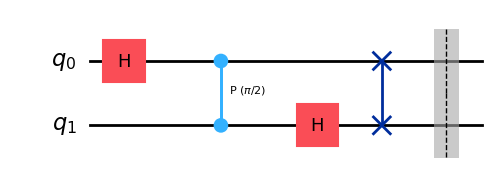

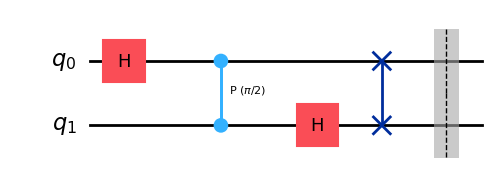

In [4]:
# Defining QFT and inverse

def F(qc):
    qc.h(0)
    qc.cp(m.pi/2, 1, 0)
    qc.h(1)
    qc.swap(0,1) # if using this, first H acts on 1
    qc.barrier()
    return qc

def F_inv(qc):
    qc.swap(0,1)
    qc.h(1)
    qc.cp(-m.pi/2, 0, 1)
    qc.h(0)
    qc.barrier()
    return qc  


qc_F = QuantumCircuit(2)
F(qc_F)
qc_F.draw(output='mpl')


We next will define $D$, our gate that is the kinetic portion of the Hamiltonian. 


<img src="Tunneling Images/D gate.png">

In [5]:
# Defining the diagonal e^{-iKt} matrix
def D(qc, theta0, theta1, theta2):
    """Apply the D operation"""
    qc.rz(theta0, 0)
    qc.rz(theta1, 1)
    qc.cp(theta2, 1,0) 
    qc.barrier()
    return qc

Now, we will define some parameters and then we will run the evolution.

Here, we will only run one time step. Note that since $V=0$, we have that $[K,V]$ commutes, so we should expect that running two joined circuits with $t_1 + t_2 = T$ should give the same result as just running one circuit at $T$. 

We will start in the state $|01\rangle$, so we apply an $X$ gate onto qubit 1.

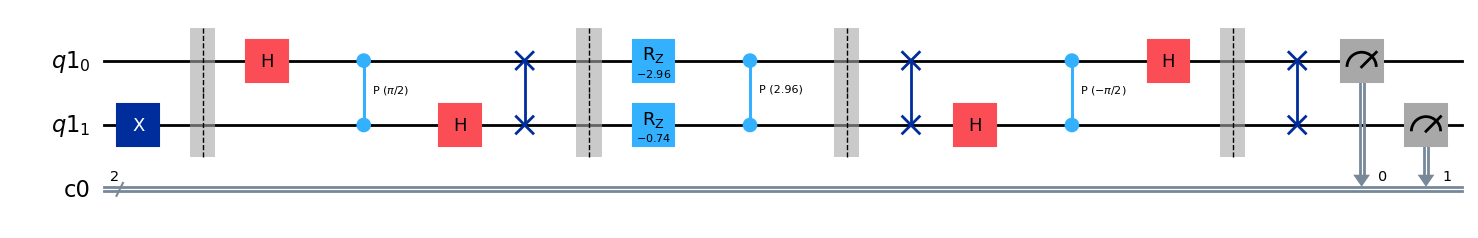

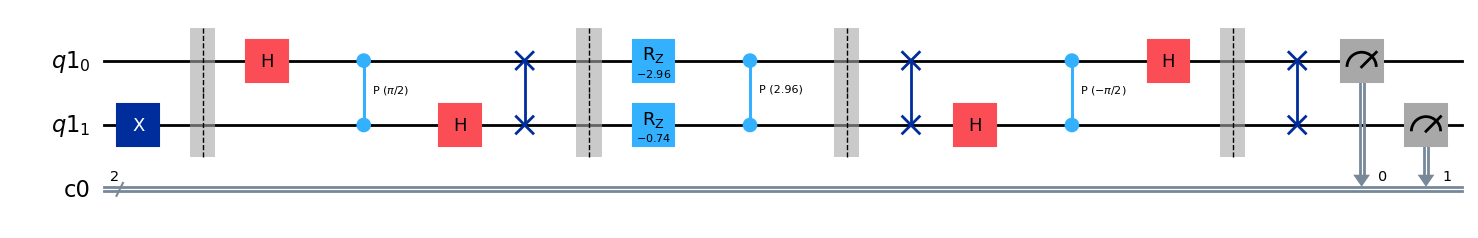

In [6]:
# Setting the parameters for the system
delta_t = 3./10 
theta0 = -m.pi*m.pi*delta_t
theta1 = -m.pi*m.pi*delta_t/4
theta2 = m.pi*m.pi*delta_t

# Initializing the circuit
# Create the quantum circuit
qr = QuantumRegister(2) #the qubits needed
cr = ClassicalRegister(2) #for the measurement
qc = QuantumCircuit(qr, cr) #creating the quantum circuit

# We create an initial state, making our |psi(x, 0)> = |01>
qc.x(1)
qc.barrier()

# Let's apply the kinetic evolution
F(qc)
D(qc, theta0, theta1, theta2)
F_inv(qc)

qc.swap(0,1) 
# We apply a swap so that the results are easier to read. 
# The histogram gives us results |q_0 q_1> = |00>, |10>, |01>, |11>.
# But our order in discrete space is |00>, |01>, |10>, |11>
# We thus apply a swap because it makes the result easier to read.

# Now let's apply a measurement.
qc.measure( qr , cr )

# Let's draw out the circuit to see what's happening.
qc.draw(output='mpl')

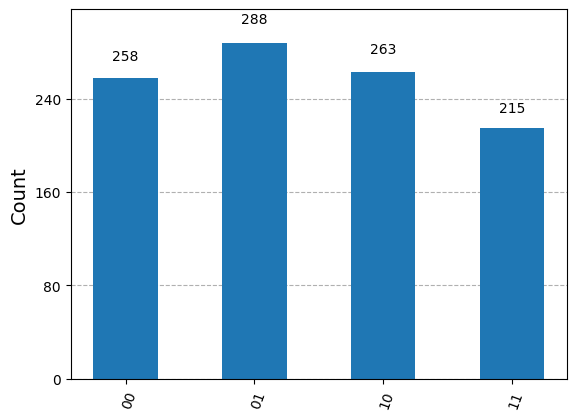

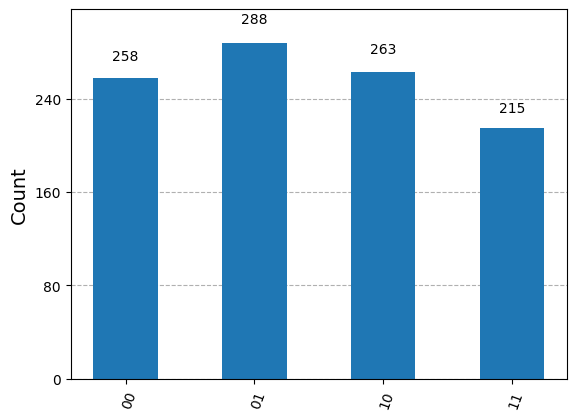

In [7]:
# run with classical simulator
result = AerSimulator().run(qc).result()
# collect stats
statistics = result.get_counts()
# plot
display(plot_histogram(statistics))  

# The Potential Term

We will now move on with our discussion and look at the potential term. The kinetic term was diagonal in the momentum basis, but the potential term is diagonal in the position basis. 

Since we've already decided to have individual qubit states represent discrete spaces, this does not require any special transformation. 

In general, the potentials can be very complicated, but for this example, we consider a double well. 


<img src="Tunneling Images/Double Well Start.png">

Then, our potential operator can be written as:

$$V = \begin{bmatrix} +V_0 & 0 & 0 & 0 \\ 0 & -V_0 & 0 & 0 \\ 0 & 0 & +V_0 & 0 \\ 0 & 0 & 0 & -V_0 \end{bmatrix}$$

We have a barrier in the $|00 \rangle$ and $|10 \rangle$ spots.

The resulting exponential, $e^{-iV\Delta t}$, would then be:

$$V = \begin{bmatrix} e^{-iV_0\Delta t} & 0 & 0 & 0 \\ 0 & e^{+iV_0\Delta t} & 0 & 0 \\ 0 & 0 & e^{-iV_0\Delta t} & 0 \\ 0 & 0 & 0 & e^{+iV_0\Delta t} \end{bmatrix}$$


Recall that: 

$$ R_z(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi}\end{bmatrix} $$


Consider the operation $ I \otimes R_z(\phi) $

$$ I \otimes R_z(\phi) = \begin{bmatrix}  1 & 0 \\ 0 & 1 \end{bmatrix}\otimes \begin{bmatrix}  1 & 0 \\ 0 & e^{i\phi}\end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & e^{i\phi} & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\phi}\end{bmatrix}$$

We can allow for a shift by a global phase, so by setting $\phi = 2V_0 \Delta t$, we effectively achieve the potential shown. 

$$ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & e^{i\phi} & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\phi}\end{bmatrix} = e^{+iV_0\Delta t}\begin{bmatrix} e^{-iV_0\Delta t} & 0 & 0 & 0 \\ 0 & e^{+iV_0\Delta t} & 0 & 0 \\ 0 & 0 & e^{-iV_0\Delta t} & 0 \\ 0 & 0 & 0 & e^{+iV_0\Delta t} \end{bmatrix} $$

Let's now do this in Qiskit!

Let's define two functions. One for applying the potential, and another for the full evolution. We use $D$ from before!

In [26]:
def V(qc, v_0, delta_t):
    """Write in the function to apply the potential term"""
    qc.rz(2*v_0*delta_t, 1) 
    qc.barrier()
    return qc

# This function will do the full evolution!
def apply_evo(qc, v_0, delta_t, theta0, theta1, theta2):
    """Write in the function to apply the full evolution."""
    F(qc)
    D(qc, theta0, theta1, theta2)
    F_inv(qc)
    V(qc, v_0, delta_t)
    qc.barrier()
    return qc


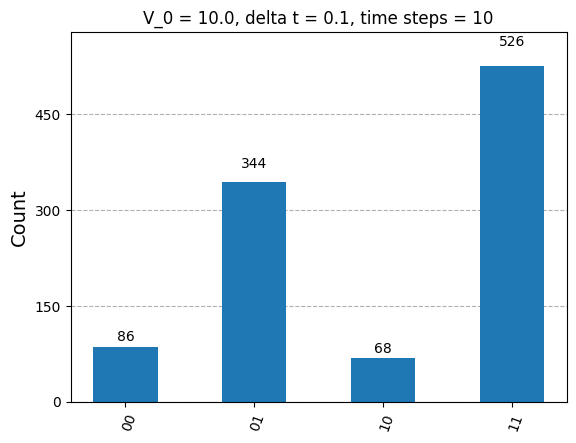

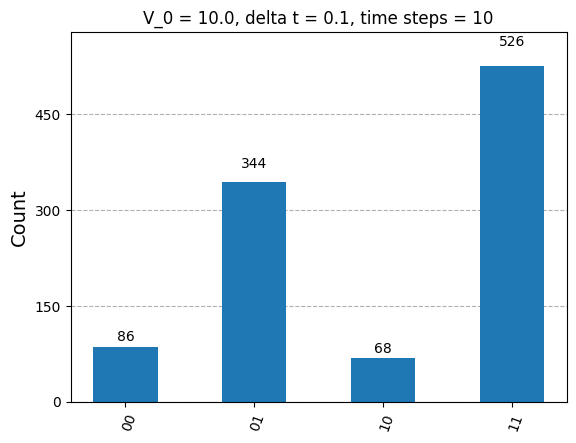

In [29]:
# Necessary Constants and parameters
delta_t = 1 / 10
theta0 = -m.pi*m.pi*delta_t
theta1 = -m.pi*m.pi*delta_t/4
theta2 = m.pi*m.pi*delta_t
time_steps = 10
v_0 = 10.

# Initializing the circuit
# Create the quantum and classical register, and then the circuit.
qr = QuantumRegister(2) #the qubits needed
cr = ClassicalRegister(2) #for the measurement
qc2 = QuantumCircuit(qr, cr) #creating the quantum circuit

# Create the initial state. We start in |01>
qc2.x(1) 
qc2.barrier()

# We will apply the steps with a loop so we can
# indicate the number of time steps. 

i = 0
while i < time_steps:
    apply_evo(qc2, v_0, delta_t, theta0, theta1, theta2)
    i+=1


qc2.swap(0,1)
# This swap is applied for he same reason as above

qc2.measure( qr , cr )

#print(qc2.draw())

result = AerSimulator().run(qc2).result()
# collect stats
statistics = result.get_counts()

plot_histogram(statistics, title = "V_0 = " + str(v_0) + ", delta t = " + str(delta_t) + ", time steps = " + str(time_steps))

In tutorial, you can explore longer time steps, more time steps, etc. When we use one $t$ step, we will be closer to just being in $|01\rangle$.

# Some Outlook

Quantum simulation of all sorts is a very active area of research in quantum computing! In this lecture, we considered only the quantum tunneling of a double well.

Some project ideas:
- Quantum Tunneling for triple, quadruple, quintuple (etc.) well
- Other potentials (Harmonic Oscillator, Step Potential)

## References

https://www.nature.com/articles/srep02232.pdf


https://arxiv.org/pdf/1712.07326.pdf

